<h1>
<center>CFRM 421/521</center>
</h1>

<h1>
<center>Terence Chiu</center>
</h1>

<h1>
<center>Homework 4</center>
</h1>

* **Due: Tuesday, May 27, 2025, 11:59 PM**


* Total marks: 43


* Late submissions are allowed, but a 20% penalty per day applies. Your last submission is considered for calculating the penalty.


*  Use this Jupyter notebook as a template for your solutions. **Your solution must be submitted as both one Jupyter notebook and one PDF file on Gradescope.** There will be two modules on Gradescope, one for each file type. The notebook must be already run, that is, make sure that you have run all the code, save the notebook, and then when you reopen the notebook, checked that all output appears as expected. You are allowed to use code from the textbook, textbook website, or lecture notes.

# 1. A regression MLP [12 marks]

Consider the original source of the California housing data (used in Homework 2) in Scikit-Learn.  The data is obtained and split using the code below, where we split off 20% as the test set, and then split off 20% of the training set as a validation set, and keep the remaining 80% of the training set as the actual training set. The following code creates the training set `X_train`, `y_train`, the validation set `X_valid`, `y_valid` and the test set `X_test`, `y_test`.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_tmp, y_train_tmp, test_size=0.2, random_state=42)

## (a) [4 marks]

Use `tensorflow.keras` to train a regression MLP with a normalization layer as the first layer (`tf.keras.layers.Normalization(input_shape=X_train.shape[1:])`), and one hidden layer of 50 ReLU neurons. For the output layer, try both a ReLU activation function and no activation function (which is equivalent to the identity function). Explain which choice is better. Use the appropriate weight initialization. Use the Nadam optimizer. Train for 30 epochs, and report the mean squared error on the validation set. In the `.compile()` method, use `loss="mse"`.

**[Add your solution here]**

In [ ]:
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_valid_flattened = X_valid.reshape(X_valid.shape[0], -1)

mlp_non = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train_flattened.shape[1:]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

mlp_non.compile(loss="mse", optimizer="Nadam")


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
%time mlp_non.fit(X_train_flattened, y_train, epochs=30)

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.7566
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.6450
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.2868
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.0674
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.3742
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.7332
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.2651
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.6757
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 26.3847
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.1730
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.8736
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 1.6087
Epoch 13/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.1741
Epoch 14/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 18.6088
Epoch 15/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - 

In [18]:
val_mse = mlp_non.evaluate(X_valid_flattened, y_valid)
print(f"Validation MSE: {val_mse}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8380
Validation MSE: 0.8447631597518921


In [19]:
mlp_relu = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train_flattened.shape[1:]),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

mlp_relu.compile(loss="mse", optimizer="Nadam")

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
%time mlp_relu.fit(X_train_flattened, y_train, epochs=30)

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 17.2520
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.5060
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.5532
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.5279
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.6102
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.4817
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.4536
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.6263
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.6653
Epoch 10/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.6840
Epoch 11/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.5953
Epoch 12/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 5.5892
Epoch 13/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.5575
Epoch 14/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 5.6013
Epoch 15/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - l

In [21]:
val_mse = mlp_relu.evaluate(X_valid_flattened, y_valid)
print(f"Validation MSE: {val_mse}")

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8433
Validation MSE: 5.756706237792969


## (b) [6 marks]

Read the section "Fine-Tuning Neural Network Hyperparameters" in the textbook and the corresponding section in the [Jupyter notebook](https://github.com/ageron/handson-ml3/blob/main/10_neural_nets_with_keras.ipynb) on the textbook website using Keras Tuner. You will need to install the package `keras_tuner` if you don't already have it.

Then use Keras Tuner to do a randomized search to search for the best hyperparameters. Do the randomized search over the first 5000 observations of the training set. Use 20 iterations, 20 epochs per iteration. Use the same network architecture as (a) except where otherwise specified below. Use no activation function for the output layer. Use a seed of 42, and the objective is clearly to minimize validation loss. The hyperparameters to search over are:

* Hidden layers: 1 to 5.
* Number of neurons per layer: 1 to 100.
* Learning rate: 1e-4 to 1e-2 using log sampling.
* $\ell_2$ regularizers with `l2` value: 1e-4 to 100 using log sampling.
* Optimizer: `tf.keras.optimizers.SGD(learning_rate=learning_rate,clipnorm=1.0)` and `tf.keras.optimizers.Nadam(learning_rate=learning_rate)`.

Print the best hyperparameter. (You can ignore any warning message you may get).

**[Add your solution here]**

In [25]:
X_train, y_train = X_train[:5000], y_train[:5000]

In [29]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=1, max_value=5)
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=200)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    
    l2_reg = hp.Float("l2_reg", min_value=1e-4, max_value=100,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "nadam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipnorm = 1.0)
    else:
        optimizer = tf.keras.optimizers.Nadam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Normalization(input_shape=X_train.shape[1:]))
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(
                    n_neurons, 
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(l2_reg)
        ))
    
    model.add(tf.keras.layers.Dense(1))
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [30]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_loss", max_trials=20, overwrite=True,
    directory="my_california_housing", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=20,
                           validation_data=(X_valid, y_valid))

Trial 20 Complete [00h 00m 25s]
val_loss: 29.931848526000977

Best val_loss So Far: 0.7406060695648193
Total elapsed time: 00h 09m 24s


In [31]:
top_model = random_search_tuner.get_best_models(num_models=1)
best_model = top_model[0]
best_model.summary()
best_model.fit(X_train, y_train, epochs=200)
val_mse = best_model.evaluate(X_valid, y_valid)
print(f"Validation MSE: {val_mse}")


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'nadam', because it has 2 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 72)             │           648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            73 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738 (2.89 KB)

 Trainable params: 721 (2.82 KB)

 Non-trainable params: 17 (72.00 B)

Epoch 1/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 11.1591
Epoch 2/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6924
Epoch 3/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.9928
Epoch 4/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0400
Epoch 5/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2.0115
Epoch 6/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3.9734
Epoch 7/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0850
Epoch 8/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7065
Epoch 9/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.9485
Epoch 10/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.1451
Epoch 11/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4.8858
Epoch 12/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1763
Epoch 13/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.3416
Epoch 14/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3957
Epoch 15/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 

In [32]:
top_params = random_search_tuner.get_best_hyperparameters(num_trials=1)
top_params[0].values  # best hyperparameter values

{'n_hidden': 1,
 'n_neurons': 72,
 'learning_rate': 0.0006426228293037218,
 'l2_reg': 0.0007481962559686448,
 'optimizer': 'nadam'}

## (c) [2 marks]

For the best model in (b), train the model on the full training data for 200 epochs. Plot the learning curve. Does it look like the model is overfitting?

**[Add your solution here]**

In [33]:
history = best_model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_data=(X_valid, y_valid),
    verbose=1
)

Epoch 1/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.2831 - val_loss: 17.9176
Epoch 2/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.2240 - val_loss: 0.7408
Epoch 3/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15.2895 - val_loss: 0.8214
Epoch 4/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7067 - val_loss: 0.7492
Epoch 5/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8319 - val_loss: 2.0148
Epoch 6/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.5989 - val_loss: 0.8412
Epoch 7/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 15.0521 - val_loss: 0.8589
Epoch 8/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8218 - val_loss: 0.8037
Epoch 9/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.8690 - val_loss: 0.8580
Epoch 10/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.9219 - val_loss: 1.3060
Epoch 11/200
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.3477 - val_loss: 0.8842
Epoch 12/200
157/157 ━━━━━━━━━━━━━━━━━

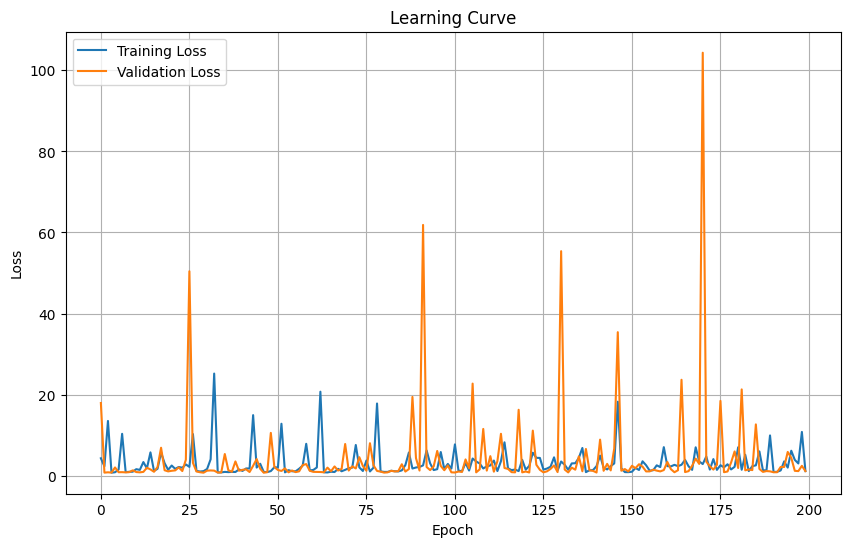

Final validation loss: 1.1235


In [34]:
# Plot the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print final validation loss
final_val_loss = history.history['val_loss'][-1]
print(f"Final validation loss: {final_val_loss:.4f}")

# 2. Binary classification DNN [17 marks]

Consider the [Portuguese Bank Marketing Data Set](https://www.kaggle.com/yufengsui/portuguese-bank-marketing-data-set?select=bank_cleaned.csv) available at Kaggle. Download the `bank_cleaned.csv` file or from [Canvas](https://canvas.uw.edu/files/106328167/download?download_frd=1). Here we want to predict the success or failure of a bank marketing campaign using phone calls to promote a term deposit product. The target variable is `response_binary`.

The following code preprocesses the data. The day and month have been converted into cyclical features(1st day of the month has equal distance to the 2nd and the 31st).

In [35]:
df = pd.read_csv("bank_cleaned.csv")

month_dict = {"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6,
              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
day_rad = (df["day"] - 1) * (2 * np.pi / 31)
month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)
df["day_sin"] = np.sin(day_rad)
df["day_cos"] = np.cos(day_rad)
df["month_sin"] = np.sin(month_rad)
df["month_cos"]  = np.cos(month_rad)
df.drop(columns=["Unnamed: 0", "month", "day", "response"], axis=1, inplace=True)
df.head()

/var/folders/vl/xcbt_9650nz8tknq733z87640000gn/T/ipykernel_16890/648047190.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  month_rad = (df["month"].replace(month_dict) - 1) * (2 * np.pi / 12)


,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,response_binary,day_sin,day_cos,month_sin,month_cos
0,58,management,married,tertiary,no,2143,yes,no,4.35,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
1,44,technician,single,secondary,no,29,yes,no,2.52,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
2,33,entrepreneur,married,secondary,no,2,yes,yes,1.27,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
3,35,management,married,tertiary,no,231,yes,no,2.32,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5
4,28,management,single,tertiary,no,447,yes,yes,3.62,1,-1,0,unknown,0,0.724793,0.688967,0.866025,-0.5


In [36]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

train_set_tmp, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set, valid_set = train_test_split(train_set_tmp, test_size=0.2, random_state=42)

X_train_raw = train_set.drop("response_binary", axis=1).copy()
y_train = train_set["response_binary"].copy()
X_valid_raw = valid_set.drop("response_binary", axis=1).copy()
y_valid = valid_set["response_binary"].copy()
X_test_raw = test_set.drop("response_binary", axis=1).copy()
y_test = test_set["response_binary"].copy()

num_attribs = list(X_train_raw._get_numeric_data().columns)
cat_attribs = list(set(X_train_raw.columns) - set(num_attribs))

cat_attribs_ord = ['default', 'housing', 'loan']
cat_attribs_hot = ['job', 'marital', 'education', 'poutcome']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat_hot", OneHotEncoder(), cat_attribs_hot),
        ("cat_ord", OrdinalEncoder(categories=[['no','yes'],['no','yes'],['no','yes']]), cat_attribs_ord)
    ])

X_train = full_pipeline.fit_transform(X_train_raw)
X_valid = full_pipeline.transform(X_valid_raw)
X_test = full_pipeline.transform(X_test_raw)

## (a) [4 marks]

In the next part you will build and fit a DNN with 4 hidden layers of 100 neurons each. Use the following specifications:

(i) He initialization and the Swish activation function.

(ii) The output layer has 1 neuron with sigmoid activation.

(iii) Compile with `loss="binary_crossentropy"` and  `metrics=["AUC"]`.

Explain why the choices (i), (ii), and (iii) are justified.

Also, state the proportion of sucesses in the training data.

**[Add your solution here]**

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["AUC"])

- He initialization prevents the vanishing/exploding gradient problem by scaling weights based on number of input neurons
- Swish activation, which is x * sigmoid(x), is justified because it works better than ReLU by letting in small negative values. It is more smooth aand differentiable everywhere.

- Since this is a binary classification problem, 1 neuron is justified using sigmoid since the output we need are between 0 and 1.
- Binary crossentropy because this is the standard loss function for our purpose
- AUC metric is used because we are evluating how the model can distinguish between classes

In [48]:
proportion_success = y_train.mean()
print(f"Proportion of successes in training data: {proportion_success:.4f}")

Proportion of successes in training data: 0.1117


## (b) [3 marks]

Train the model in (a) for 30 epochs and use exponential scheduling using the function below (`lr0=0.01`, `s=20`) and the NAG optimizer with `momentum=0.9`. Use a learning curve to comment on whether it is overfitting.

At the start of fitting your model, run `reset_session()` given by the following code.

In [40]:
def reset_session(seed=42):
    tf.random.set_seed(seed)
    np.random.seed(seed)
    tf.keras.backend.clear_session()
    
def exponential_decay(lr0, s):
    return lambda epoch: lr0 * 0.1**(epoch / s)

**[Add your solution here]**

Epoch 1/30


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - AUC: 0.8279 - loss: 0.2757 - val_AUC: 0.9023 - val_loss: 0.2230 - learning_rate: 0.0100
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9092 - loss: 0.2166 - val_AUC: 0.9080 - val_loss: 0.2173 - learning_rate: 0.0089
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9150 - loss: 0.2108 - val_AUC: 0.9106 - val_loss: 0.2139 - learning_rate: 0.0079
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9188 - loss: 0.2070 - val_AUC: 0.9128 - val_loss: 0.2114 - learning_rate: 0.0071
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9217 - loss: 0.2039 - val_AUC: 0.9144 - val_loss: 0.2095 - learning_rate: 0.0063
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9242 - loss: 0.2012 - val_AUC: 0.9155 - val_loss: 0.2081 - learning_rate: 0.0056
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - AUC: 0.9265 - loss: 0.1988 - val_AUC: 0.9161 - val_loss: 0.2070 - learning_rate: 0.0050
Epoch 8/30
817/81

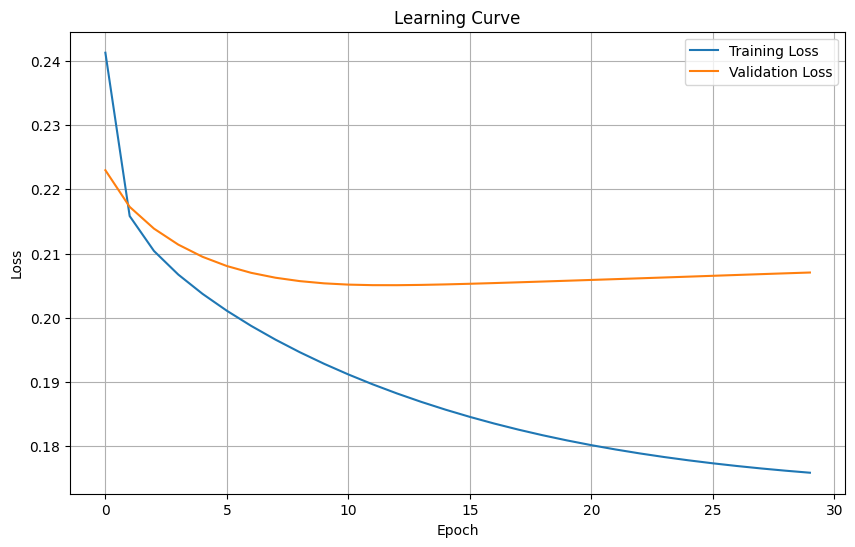

In [53]:
reset_session()

model = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.01,
    momentum=0.9,
    nesterov=True
)

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["AUC"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(
    exponential_decay(0.01, 20)
)

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler])

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Since validation loss starts increasing while training loss continues decreasing, this indicates overfitting

## (c) [8 marks]

Fit separate models using the same specification as in (b) but with the following regularization techniques:

(i) batch normalization,

(ii) early stopping based on validation AUC with `patience=10` (look at the documentation and note the `mode` argument).

(iii) $\ell_2$ regularization with `l2=0.0002`,

(iv) dropout with probability 0.02,

(v) $\ell_2$ regularization and early stopping both as above,

(vi) batch normalization and dropout both as above.

At the start of each one of the above models, run `reset_session()`.

The performance measure is validation AUC. State this for the model in (b), and for each of the models here comment on whether it is better than the model in (b).

**[Add your solution here]**

(i) batch normalization

In [44]:
reset_session()
model_batch = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model_batch.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
    model_batch.add(tf.keras.layers.BatchNormalization())

model_batch.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_batch.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["AUC"])
model_batch.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - AUC: 0.7901 - loss: 0.3971 - val_AUC: 0.8895 - val_loss: 0.2327
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9015 - loss: 0.2241 - val_AUC: 0.9080 - val_loss: 0.2169
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - AUC: 0.9131 - loss: 0.2152 - val_AUC: 0.9036 - val_loss: 0.2213
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 21s 26ms/step - AUC: 0.9155 - loss: 0.2088 - val_AUC: 0.9095 - val_loss: 0.2158
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - AUC: 0.9180 - loss: 0.2083 - val_AUC: 0.9119 - val_loss: 0.2156
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9247 - loss: 0.1988 - val_AUC: 0.9109 - val_loss: 0.2160
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9202 - loss: 0.2030 - val_AUC: 0.9139 - val_loss: 0.2132
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9280 - loss: 0.1937 - val_AUC: 0.9059 - val_loss: 0.2190
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/st

(ii) early stopping

In [50]:
reset_session()
model_es = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model_es.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

model_es.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_es.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["AUC"])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    patience=10,
    mode='max'
)

model_es.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/30


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - AUC: 0.8412 - loss: 0.2695 - val_AUC: 0.9011 - val_loss: 0.2241
Epoch 2/30
  9/817 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - AUC: 0.9513 - loss: 0.1757

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - AUC: 0.9107 - loss: 0.2151 - val_AUC: 0.9062 - val_loss: 0.2190
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9177 - loss: 0.2081 - val_AUC: 0.9094 - val_loss: 0.2159
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9229 - loss: 0.2027 - val_AUC: 0.9106 - val_loss: 0.2148
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - AUC: 0.9275 - loss: 0.1976 - val_AUC: 0.9104 - val_loss: 0.2154
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - AUC: 0.9316 - loss: 0.1925 - val_AUC: 0.9084 - val_loss: 0.2175
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9358 - loss: 0.1872 - val_AUC: 0.9064 - val_loss: 0.2210
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9398 - loss: 0.1815 - val_AUC: 0.9037 - val_loss: 0.2258
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9442 - loss: 0.1752 - val_AUC: 0.9017 - val_loss: 0.2314
Epoch 10/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/s

(iii) l2 regularization

In [51]:
reset_session()
model_l2 = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model_l2.add(tf.keras.layers.Dense(
        100, 
        activation="swish", 
        kernel_initializer="he_normal",
        kernel_regularizer=tf.keras.regularizers.l2(0.0002)
    ))

model_l2.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_l2.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["AUC"])
model_l2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - AUC: 0.8400 - loss: 0.4149 - val_AUC: 0.9029 - val_loss: 0.3208
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9080 - loss: 0.3052 - val_AUC: 0.9069 - val_loss: 0.2829
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9131 - loss: 0.2719 - val_AUC: 0.9097 - val_loss: 0.2619
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9162 - loss: 0.2528 - val_AUC: 0.9111 - val_loss: 0.2499
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9181 - loss: 0.2412 - val_AUC: 0.9120 - val_loss: 0.2425
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9197 - loss: 0.2339 - val_AUC: 0.9126 - val_loss: 0.2376
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9210 - loss: 0.2289 - val_AUC: 0.9135 - val_loss: 0.2341
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9222 - loss: 0.2253 - val_AUC: 0.9143 - val_loss: 0.2315
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/st

(iv) dropout

In [52]:
reset_session()
model_dropout = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model_dropout.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
    model_dropout.add(tf.keras.layers.Dropout(0.02))

model_dropout.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_dropout.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["AUC"])
model_dropout.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - AUC: 0.8415 - loss: 0.2669 - val_AUC: 0.9010 - val_loss: 0.2238
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9103 - loss: 0.2157 - val_AUC: 0.9068 - val_loss: 0.2190
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9180 - loss: 0.2078 - val_AUC: 0.9121 - val_loss: 0.2135
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9232 - loss: 0.2021 - val_AUC: 0.9145 - val_loss: 0.2110
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9270 - loss: 0.1981 - val_AUC: 0.9148 - val_loss: 0.2106
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9308 - loss: 0.1938 - val_AUC: 0.9143 - val_loss: 0.2107
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9327 - loss: 0.1908 - val_AUC: 0.9144 - val_loss: 0.2107
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - AUC: 0.9370 - loss: 0.1855 - val_AUC: 0.9130 - val_loss: 0.2133
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/st

(v) L2 + Early Stopping

In [54]:
reset_session()
model_l2_es = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model_l2_es.add(tf.keras.layers.Dense(
        100, 
        activation="swish", 
        kernel_initializer="he_normal",
        kernel_regularizer=tf.keras.regularizers.l2(0.0002)
    ))

model_l2_es.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_l2_es.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["AUC"])
model_l2_es.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[early_stopping])

Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - AUC: 0.8490 - loss: 0.4039 - val_AUC: 0.9027 - val_loss: 0.3205
Epoch 2/30
  9/817 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - AUC: 0.9536 - loss: 0.2677

/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,loss,val_AUC,val_loss
  current = self.get_monitor_value(logs)


817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9096 - loss: 0.3044 - val_AUC: 0.9076 - val_loss: 0.2822
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9146 - loss: 0.2711 - val_AUC: 0.9106 - val_loss: 0.2606
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9173 - loss: 0.2518 - val_AUC: 0.9128 - val_loss: 0.2478
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9192 - loss: 0.2403 - val_AUC: 0.9142 - val_loss: 0.2398
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9205 - loss: 0.2332 - val_AUC: 0.9155 - val_loss: 0.2346
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9219 - loss: 0.2285 - val_AUC: 0.9162 - val_loss: 0.2311
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9227 - loss: 0.2252 - val_AUC: 0.9168 - val_loss: 0.2285
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - AUC: 0.9234 - loss: 0.2227 - val_AUC: 0.9176 - val_loss: 0.2267
Epoch 10/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/s

(vi) Batch Normalization + Dropout

In [55]:
reset_session()
model_bn_dropout = tf.keras.Sequential([
    tf.keras.layers.Normalization(input_shape=X_train.shape[1:]),
])

for _ in range(4):
    model_bn_dropout.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
    model_bn_dropout.add(tf.keras.layers.BatchNormalization())
    model_bn_dropout.add(tf.keras.layers.Dropout(0.02))

model_bn_dropout.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model_bn_dropout.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["AUC"])
model_bn_dropout.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - AUC: 0.7886 - loss: 0.3987 - val_AUC: 0.8883 - val_loss: 0.2355
Epoch 2/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9030 - loss: 0.2239 - val_AUC: 0.8973 - val_loss: 0.2296
Epoch 3/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - AUC: 0.9182 - loss: 0.2082 - val_AUC: 0.8966 - val_loss: 0.2316
Epoch 4/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9276 - loss: 0.1974 - val_AUC: 0.8927 - val_loss: 0.2413
Epoch 5/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - AUC: 0.9353 - loss: 0.1881 - val_AUC: 0.8954 - val_loss: 0.2421
Epoch 6/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - AUC: 0.9431 - loss: 0.1776 - val_AUC: 0.8906 - val_loss: 0.2516
Epoch 7/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - AUC: 0.9491 - loss: 0.1684 - val_AUC: 0.8871 - val_loss: 0.2597
Epoch 8/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - AUC: 0.9563 - loss: 0.1569 - val_AUC: 0.8842 - val_loss: 0.2666
Epoch 9/30
817/817 ━━━━━━━━━━━━━━━━━━━━ 

## (d) [1 mark]

For the dropout model in (c)(iv) determine whether or not it is overfitting less than the model in (b).

**[Add your solution here]**

In [82]:
plt.plot(history.history['auc'], label='Model (b) Training AUC')
plt.plot(model.history['val_auc'], label='Model (b) Validation AUC')
plt.plot(model_dropout.history['auc'], label='Dropout Training AUC')
plt.plot(model_dropout.history['val_auc'], label='Dropout Validation AUC')
plt.title('AUC Curves')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

KeyError: 'auc'

## (e) [1 mark]

Of the models in (b) and (c), one would now choose the best model according to the performance metric (validation AUC) to evaluate on the test set. But instead, evaluate the model in (c)(v) on the test set in terms of the AUC and confusion matrix (regardless of whether it is the best model given your results).

**[Add your solution here]**

# 3. Time series using machine learning [14 marks]

Obtain daily values of the [Japan/U.S. Foreign Exchange Rate (DEXJPUS)](https://fred.stlouisfed.org/series/DEXJPUS) starting from Jan 1, 1990, to Jan 1, 2023, from FRED. This can be obtained using the code below or you can download the data as a csv file from [Canvas](https://canvas.uw.edu/files/106328118/download?download_frd=1).

In [56]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
data = pdr.get_data_fred('DEXJPUS', datetime(1990,1,1),datetime(2023,1,1))

## (a) [2 marks]

Create a training set (before 2010), a validation set (Jan 2010 to Dec 2015), and a test set (the rest of the data). Turn the time series data into a supervised learning dataset where the features are the value of the exchange rate in the last 10 days inclusive of the current day, and the target is the value of the exchange rate in the next day.

**[Add your solution here]**

In [ ]:
train_data = data[data.index < '2010-01-01']
val_data = data[(data.index >= '2010-01-01') & (data.index < '2016-01-01')]
test_data = data[data.index >= '2016-01-01']

def create_supervised_dataset(data, window_size=10):
    X = []
    y = []
    
    for i in range(len(data) - window_size):
        window = data.iloc[i:i+window_size].values
        next_day = data.iloc[i+window_size].values[0]
        
        if not np.isnan(window).any() and not np.isnan(next_day):
            X.append(window)
            y.append(next_day)
    
    return np.array(X), np.array(y)

X_train, y_train = create_supervised_dataset(train_data)
X_val, y_val = create_supervised_dataset(val_data)
X_test, y_test = create_supervised_dataset(test_data)

print("Training set shapes:", X_train.shape, y_train.shape)
print("Validation set shapes:", X_val.shape, y_val.shape)
print("Test set shapes:", X_test.shape, y_test.shape)


w

Training set shapes: (3299, 10, 1) (3299,)
Validation set shapes: (948, 10, 1) (948,)
Test set shapes: (1077, 10, 1) (1077,)


## (b) [3 marks]

Fit a random forest regressor to predict the value of the exchange rate in the next day. Using the test set, report the mean squared error and the accuracy for the movement direction.

Hint: You can calculate the accuracy of the movement direction by determining what the actual movement direction is and comparing it to the movement direction corresponding to the predicted value of the exchange rate. For instance, the movement direction of the test set `X_test` and `y_test` where a strictly up movement is `True` can be computed as follows.

In [65]:
movement_test = X_test[:,-1] < y_test.ravel()

**[Add your solution here]**

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

X_train_2d = X_train.reshape(X_train.shape[0], -1)  # Shape: (n_samples, window_size)
X_val_2d = X_val.reshape(X_val.shape[0], -1)
X_test_2d = X_test.reshape(X_test.shape[0], -1)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_2d, y_train)

y_pred = rf_model.predict(X_test_2d)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

movement_pred = X_test_2d[:,-1] < y_pred.ravel()  # Predicted movement

# Accuracy
movement_accuracy = (movement_test == movement_pred).mean()
print(f"Movement Direction Accuracy: {movement_accuracy:.4f}")



Mean Squared Error: 0.5493
Movement Direction Accuracy: 0.4930


## (c) [4 marks]

Repeat (b), but now fit a deep RNN with 2 recurrent layers of 20 and 20 neurons, and an output layer which is 1 dense neuron. Use 100 epochs and the Nadam optimizer. Comment on the result and the learning curve (the validation set is used for the learning curve).

**[Add your solution here]**

In [75]:
reset_session()

model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, input_shape=[None,1], return_sequences=True),
    tf.keras.layers.SimpleRNN(20, return_sequences=False),
    tf.keras.layers.Dense(1)
])

model_rnn.compile(loss="mse", optimizer="nadam")

history = model_rnn.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_data=(X_val, y_val)
)

Epoch 1/100


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


104/104 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 12891.4277 - val_loss: 7913.6392
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 11741.1982 - val_loss: 7478.3936
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 11225.0596 - val_loss: 7094.3535
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 10755.0527 - val_loss: 6733.2368
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - loss: 10308.8545 - val_loss: 6389.3262
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss: 9880.9355 - val_loss: 6060.2075
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 9468.8096 - val_loss: 5744.5322
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 9071.0557 - val_loss: 5441.4077
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - loss: 8686.7178 - val_loss: 5150.1807
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 98ms/step - loss: 8315.0908 - val_loss: 4870.3296
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/s

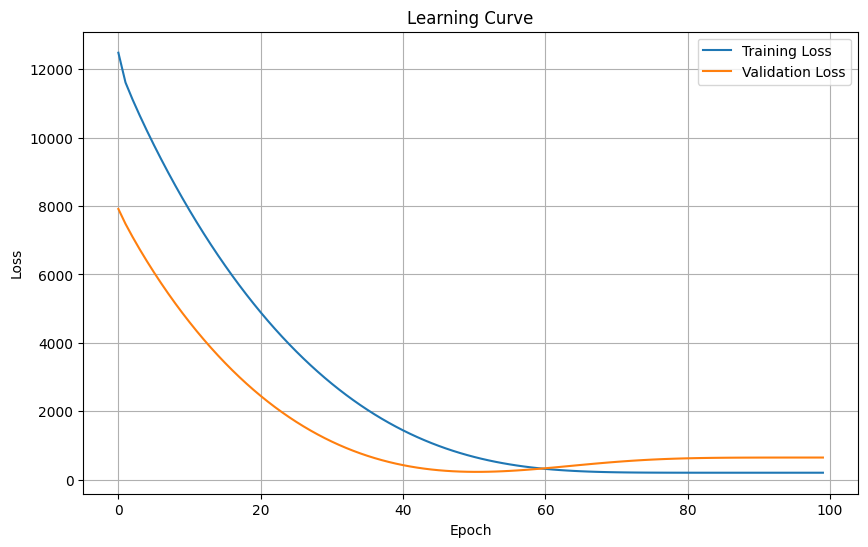

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step

Test MSE: 91.5637
Movement Direction Accuracy: 0.6182


In [76]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate on test set
y_pred = model_rnn.predict(X_test)
y_pred = y_pred.reshape(-1)

mse = mean_squared_error(y_test, y_pred)
print(f"\nTest MSE: {mse:.4f}")

# Calculate movement direction accuracy
movement_test = X_test[:,-1] < y_test.ravel()
movement_pred = X_test[:,-1] < y_pred.ravel()
movement_accuracy = (movement_test == movement_pred).mean()
print(f"Movement Direction Accuracy: {movement_accuracy:.4f}")

## (d) [5 marks]

Create a supervised learning dataset suitable for predicting 3 days ahead instead of 1 day ahead. Adjust the deep RNN in (c) so that it predicts 3 days ahead. Use 100 epochs and the Nadam optimizer. Using the test set, report the mean squared error and the accuracy for the movement direction for each of the 3 days ahead predictions.  Comment on the result and the learning curve.

**[Add your solution here]**

Epoch 1/100


/Users/terencechiu/Documents/CFRM421/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - loss: 13169.1279 - val_loss: 8608.0742
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 12561.2266 - val_loss: 8210.3369
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 12087.9941 - val_loss: 7847.4736
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 11647.9873 - val_loss: 7503.0513
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 11227.1416 - val_loss: 7172.8057
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 10821.3105 - val_loss: 6854.8564
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 10428.5654 - val_loss: 6548.1343
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 98ms/step - loss: 10047.7793 - val_loss: 6251.9321
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - loss: 9678.2002 - val_loss: 5965.7266
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 9319.2666 - val_loss: 5689.1094
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - loss: 8970.5332 - val_l

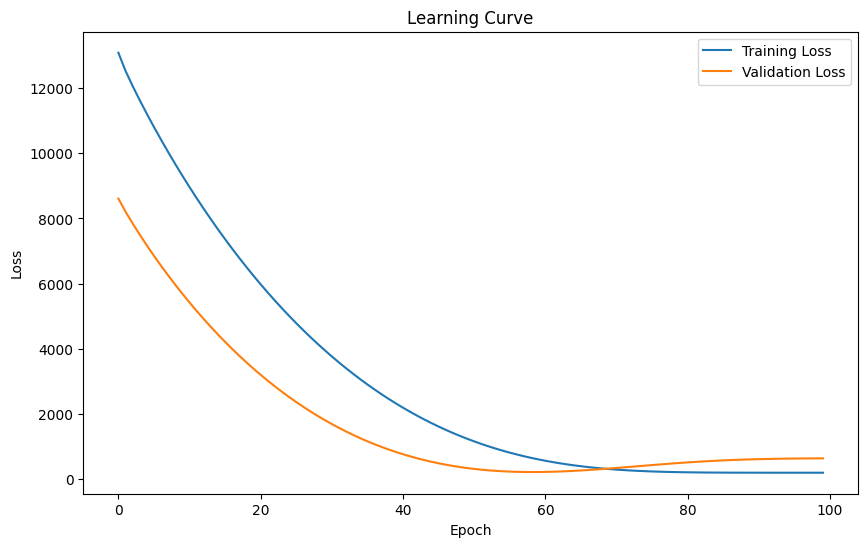

In [79]:
def create_supervised_dataset_3days(data, window_size=10):
    X = []
    y = []
    for i in range(len(data) - window_size - 2):
        window = data.iloc[i:i+window_size].values
        next_3_days = data.iloc[i+window_size:i+window_size+3].values.ravel()
        if not np.isnan(window).any() and not np.isnan(next_3_days).any():
            X.append(window)
            y.append(next_3_days)
    return np.array(X), np.array(y)

X_train_3days, y_train_3days = create_supervised_dataset_3days(train_data)
X_val_3days, y_val_3days = create_supervised_dataset_3days(val_data)
X_test_3days, y_test_3days = create_supervised_dataset_3days(test_data)

reset_session()

model_rnn = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, input_shape=[None,1], return_sequences=True),
    tf.keras.layers.SimpleRNN(20, return_sequences=False),
    tf.keras.layers.Dense(3)
])

model_rnn.compile(loss="mse", optimizer="nadam")

history = model_rnn.fit(
    X_train_3days, y_train_3days,
    epochs=100,
    validation_data=(X_val_3days, y_val_3days)
)

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [81]:
y_pred = model_rnn.predict(X_test_3days)  # shape: (n_samples, 3)

for day in range(3):
    # MSE
    mse = mean_squared_error(y_test_3days[:, day], y_pred[:, day])
    print(f"\nDay {day+1} ahead:")
    print(f"MSE: {mse:.4f}")
    
    # Calculate movement direction accuracy
    current_rates = X_test_3days[:, -1, 0]  # Last known rate
    actual_movement = current_rates < y_test_3days[:, day]
    predicted_movement = current_rates < y_pred[:, day]
    movement_accuracy = (actual_movement == predicted_movement).mean()
    print(f"Movement Direction Accuracy: {movement_accuracy:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step

Day 1 ahead:
MSE: 90.5387
Movement Direction Accuracy: 0.5179

Day 2 ahead:
MSE: 90.1532
Movement Direction Accuracy: 0.5231

Day 3 ahead:
MSE: 90.0050
Movement Direction Accuracy: 0.5251
